In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-23 03:55:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   216MB/s    in 0.5s    

2021-11-23 03:55:39 (216 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")
  return img

['3873326.jpg']
Image Shape: (512, 512, 3)


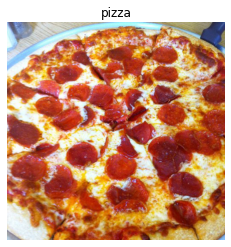

In [10]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [11]:
img

array([[[159, 190, 236],
        [139, 167, 214],
        [116, 138, 185],
        ...,
        [ 52,  77, 133],
        [ 68,  93, 149],
        [ 82, 107, 163]],

       [[164, 195, 241],
        [149, 177, 224],
        [126, 148, 195],
        ...,
        [ 65,  90, 146],
        [ 71,  96, 152],
        [ 69,  94, 150]],

       [[164, 197, 242],
        [155, 183, 230],
        [134, 156, 203],
        ...,
        [ 78, 103, 160],
        [ 73,  98, 155],
        [ 57,  82, 139]],

       ...,

       [[183, 206, 224],
        [182, 205, 223],
        [180, 203, 221],
        ...,
        [143, 194, 247],
        [140, 191, 246],
        [137, 189, 246]],

       [[181, 206, 226],
        [180, 205, 225],
        [182, 205, 223],
        ...,
        [143, 194, 247],
        [139, 191, 249],
        [140, 194, 254]],

       [[182, 207, 227],
        [183, 208, 228],
        [186, 208, 229],
        ...,
        [142, 193, 248],
        [135, 189, 249],
        [141, 196, 255]]

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[159, 190, 236],
        [139, 167, 214],
        [116, 138, 185],
        ...,
        [ 52,  77, 133],
        [ 68,  93, 149],
        [ 82, 107, 163]],

       [[164, 195, 241],
        [149, 177, 224],
        [126, 148, 195],
        ...,
        [ 65,  90, 146],
        [ 71,  96, 152],
        [ 69,  94, 150]],

       [[164, 197, 242],
        [155, 183, 230],
        [134, 156, 203],
        ...,
        [ 78, 103, 160],
        [ 73,  98, 155],
        [ 57,  82, 139]],

       ...,

       [[183, 206, 224],
        [182, 205, 223],
        [180, 203, 221],
        ...,
        [143, 194, 247],
        [140, 191, 246],
        [137, 189, 246]],

       [[181, 206, 226],
        [180, 205, 225],
        [182, 205, 223],
        ...,
        [143, 194, 247],
        [139, 191, 249],
        [140, 194, 254]],

       [[182, 207, 227],
        [183, 208, 228],
        [186, 208, 229],
        ...,
        [142, 193, 24

In [13]:
img.shape

(512, 512, 3)

In [14]:
img/255.

array([[[0.62352941, 0.74509804, 0.9254902 ],
        [0.54509804, 0.65490196, 0.83921569],
        [0.45490196, 0.54117647, 0.7254902 ],
        ...,
        [0.20392157, 0.30196078, 0.52156863],
        [0.26666667, 0.36470588, 0.58431373],
        [0.32156863, 0.41960784, 0.63921569]],

       [[0.64313725, 0.76470588, 0.94509804],
        [0.58431373, 0.69411765, 0.87843137],
        [0.49411765, 0.58039216, 0.76470588],
        ...,
        [0.25490196, 0.35294118, 0.57254902],
        [0.27843137, 0.37647059, 0.59607843],
        [0.27058824, 0.36862745, 0.58823529]],

       [[0.64313725, 0.77254902, 0.94901961],
        [0.60784314, 0.71764706, 0.90196078],
        [0.5254902 , 0.61176471, 0.79607843],
        ...,
        [0.30588235, 0.40392157, 0.62745098],
        [0.28627451, 0.38431373, 0.60784314],
        [0.22352941, 0.32156863, 0.54509804]],

       ...,

       [[0.71764706, 0.80784314, 0.87843137],
        [0.71372549, 0.80392157, 0.8745098 ],
        [0.70588235, 0

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir='pizza_steak/train/'
test_dir='pizza_steak/test/'

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

model_1 =tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation='relu',
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding='valid'),
                                     tf.keras.layers.Conv2D(10,3,activation='relu'),
                                     tf.keras.layers.Conv2D(10,3,activation='relu'),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 257ms/step - loss: 0.5708 - accuracy: 0.6880 - val_loss: 0.3966 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4361 - accuracy: 0.8073 - val_loss: 0.3604 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4184 - accuracy: 0.8080 - val_loss: 0.3165 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3701 - accuracy: 0.8433 - val_loss: 0.3006 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3110 - accuracy: 0.8753 - val_loss: 0.2862 - val_accuracy: 0.8760


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [17]:
tf.random.set_seed(42)

model_2=tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(224,224,3)),
                                    tf.keras.layers.Dense(4,activation='relu'),
                                    tf.keras.layers.Dense(4,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 0.8561 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 2.6233 - accuracy: 0.6173 - val_loss: 0.5712 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6532 - accuracy: 0.7280 - val_loss: 0.8158 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5773 - accuracy: 0.7567 - val_loss: 0.4704 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5199 - accuracy: 0.7727 - val_loss: 0.4496 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4580 - accuracy: 0.7933 - val_loss: 0.4130 - val_accuracy: 0.8180


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['3606642.jpg']
Image Shape: (512, 384, 3)
['3830773.jpg']
Image Shape: (512, 512, 3)


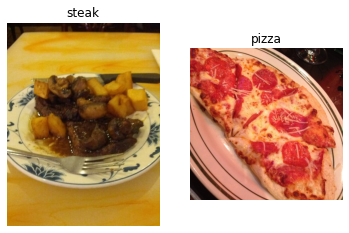

In [21]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [26]:
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
model_4=Sequential([
                    Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224,224,3)),
                    Conv2D(10,3,activation='relu'),
                    Conv2D(10,3,activation='relu'),
                    Flatten(),
                    Dense(1,activation='sigmoid')
])

In [30]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [32]:
len(train_data),len(test_data)

(47, 16)

In [33]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 254ms/step - loss: 0.8425 - accuracy: 0.7107 - val_loss: 0.4371 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4757 - accuracy: 0.7900 - val_loss: 0.4437 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3316 - accuracy: 0.8633 - val_loss: 0.3834 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.1824 - accuracy: 0.9327 - val_loss: 0.4340 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 0.0739 - accuracy: 0.9800 - val_loss: 0.4288 - val_accuracy: 0.8140


In [34]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 161ms/step - loss: 0.2862 - accuracy: 0.8760


[0.2862491309642792, 0.8759999871253967]

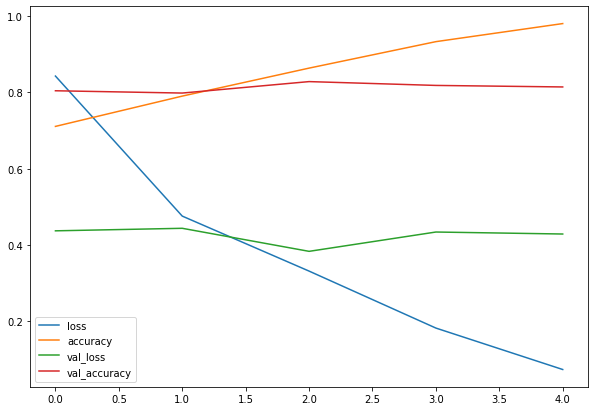

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [36]:
def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

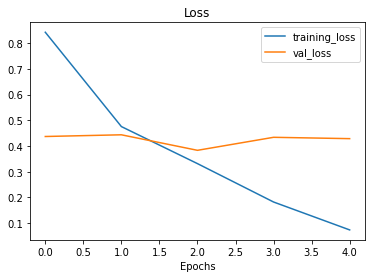

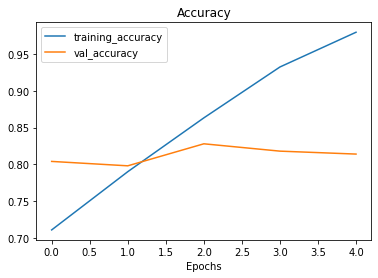

In [37]:
plot_loss_curves(history_4)

In [38]:
model_5=Sequential([
                    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                    MaxPool2D(pool_size=2),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation='sigmoid')
])

In [39]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6847 - accuracy: 0.5593 - val_loss: 0.6044 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5168 - accuracy: 0.7733 - val_loss: 0.5009 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4533 - accuracy: 0.7907 - val_loss: 0.3480 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3968 - accuracy: 0.8300 - val_loss: 0.3212 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3870 - accuracy: 0.8347 - val_loss: 0.3414 - val_accuracy: 0.8460


In [41]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

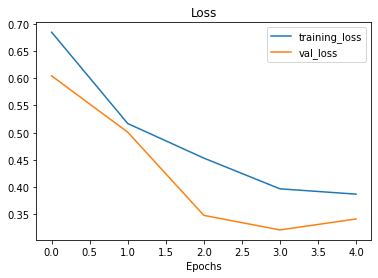

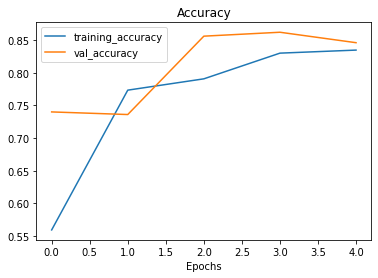

In [42]:
plot_loss_curves(history_5)

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [45]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

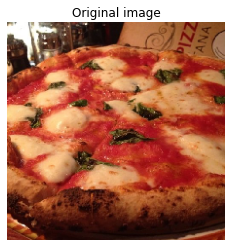

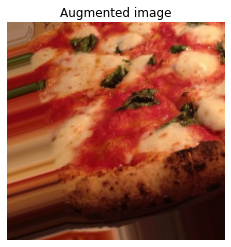

In [46]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [47]:
model_6=Sequential([
                    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                    MaxPool2D(pool_size=2),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 550ms/step - loss: 0.7021 - accuracy: 0.4487 - val_loss: 0.6857 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6939 - accuracy: 0.5213 - val_loss: 0.6743 - val_accuracy: 0.6340
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6877 - accuracy: 0.6027 - val_loss: 0.6581 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6717 - accuracy: 0.5453 - val_loss: 0.6042 - val_accuracy: 0.6220
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6032 - accuracy: 0.6880 - val_loss: 0.5515 - val_accuracy: 0.6960


In [48]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

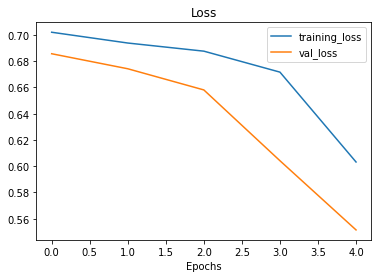

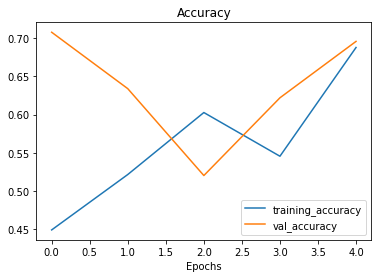

In [49]:
plot_loss_curves(history_6)

In [50]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [51]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6641 - accuracy: 0.5747 - val_loss: 0.6165 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5947 - accuracy: 0.6760 - val_loss: 0.4879 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5222 - accuracy: 0.7447 - val_loss: 0.4871 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4969 - accuracy: 0.7633 - val_loss: 0.3886 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4645 - accuracy: 0.7900 - val_loss: 0.3331 - val_accuracy: 0.8700


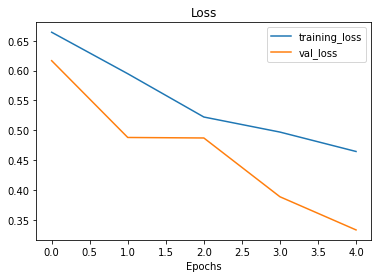

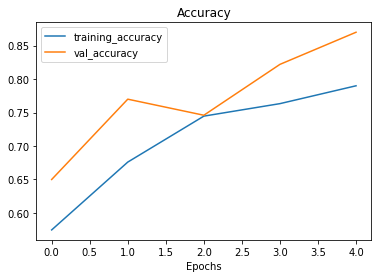

In [52]:
plot_loss_curves(history_7)

In [53]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 562ms/step - loss: 0.6185 - accuracy: 0.6373 - val_loss: 0.4309 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 26s 555ms/step - loss: 0.5260 - accuracy: 0.7333 - val_loss: 0.4243 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5101 - accuracy: 0.7653 - val_loss: 0.3977 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 26s 561ms/step - loss: 0.4998 - accuracy: 0.7620 - val_loss: 0.3716 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 26s 562ms/step - loss: 0.5138 - accuracy: 0.7600 - val_loss: 0.4219 - val_accuracy: 0.8340


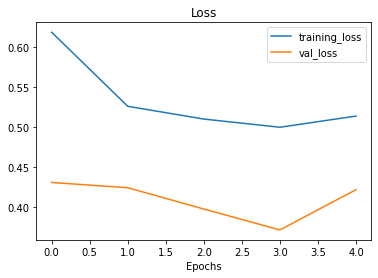

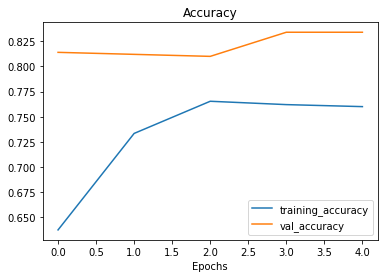

In [54]:
plot_loss_curves(history_8)

In [55]:
class_names

array(['pizza', 'steak'], dtype='<U9')

--2021-11-23 04:11:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-11-23 04:11:03 (33.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

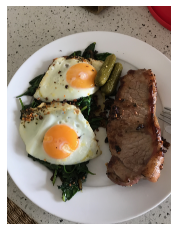

In [56]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [57]:
steak.shape

(4032, 3024, 3)

In [58]:
def load_and_prep_image(filename,img_shape=224):

  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [59]:
steak=load_and_prep_image("03-steak.jpeg")

In [61]:
steak.shape

TensorShape([224, 224, 3])

In [63]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.925969]], dtype=float32)

In [65]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [69]:
def pred_and_plot(model,filename,class_names=class_names):

  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  print(pred)
  pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

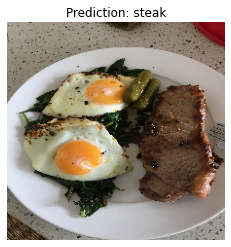

In [67]:
pred_and_plot(model_7,'03-steak.jpeg')

--2021-11-23 04:27:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-11-23 04:27:42 (39.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



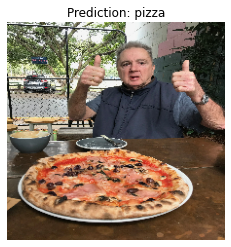

In [68]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,'03-pizza-dad.jpeg')

[[0.25973168]]


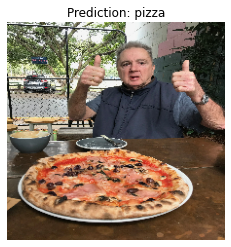

In [70]:
pred_and_plot(model_7,'03-pizza-dad.jpeg')

In [71]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-11-23 04:33:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.152.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   191MB/s    in 2.6s    

2021-11-23 04:33:56 (191 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [72]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [73]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [74]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1122280.jpg']
Image Shape: (512, 512, 3)


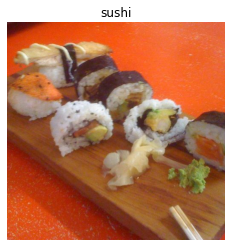

In [77]:
import random
img=view_random_image(train_dir,random.choice(class_names))

In [78]:
img.shape

(512, 512, 3)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model_9=Sequential([
                    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Conv2D(10,3,activation='relu'),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation='softmax')
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [81]:
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 248ms/step - loss: 2.1865 - accuracy: 0.1919 - val_loss: 2.0752 - val_accuracy: 0.2520
Epoch 2/5
235/235 [==============================] - 56s 238ms/step - loss: 1.9007 - accuracy: 0.3381 - val_loss: 1.8781 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 56s 238ms/step - loss: 1.4955 - accuracy: 0.4983 - val_loss: 2.0574 - val_accuracy: 0.3140
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 0.8629 - accuracy: 0.7225 - val_loss: 2.5461 - val_accuracy: 0.2868
Epoch 5/5
235/235 [==============================] - 55s 235ms/step - loss: 0.3386 - accuracy: 0.8955 - val_loss: 3.7533 - val_accuracy: 0.2796


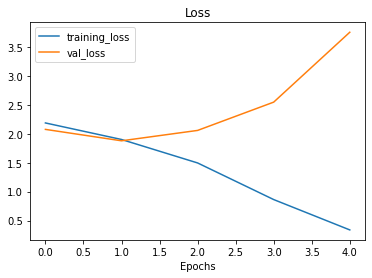

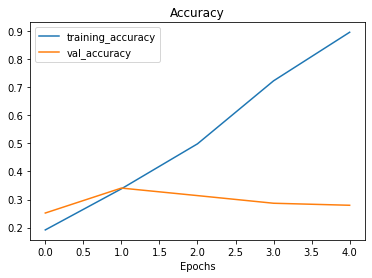

In [82]:
plot_loss_curves(history_9)

In [83]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 3.7533 - accuracy: 0.2796


[3.753335952758789, 0.27959999442100525]

In [84]:
model_10=Sequential([
                    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation='softmax')
])

model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [85]:
history_10=model_10.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 216ms/step - loss: 2.1533 - accuracy: 0.2539 - val_loss: 1.9561 - val_accuracy: 0.3236
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7987 - accuracy: 0.3880 - val_loss: 1.8986 - val_accuracy: 0.3376
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.4716 - accuracy: 0.5148 - val_loss: 1.9171 - val_accuracy: 0.3380
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 1.0039 - accuracy: 0.6816 - val_loss: 2.2455 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.5755 - accuracy: 0.8317 - val_loss: 2.8094 - val_accuracy: 0.2892


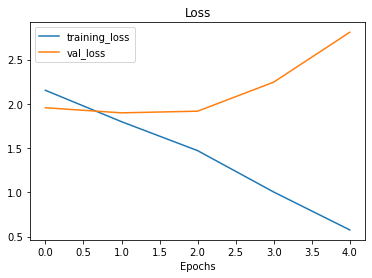

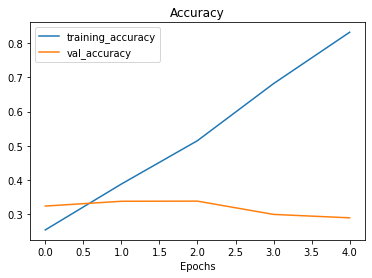

In [86]:
 plot_loss_curves(history_10)

In [87]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [89]:
model_11=tf.keras.models.clone_model(model_9)

model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [90]:
history_11=model_11.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 562ms/step - loss: 2.2295 - accuracy: 0.1789 - val_loss: 2.1185 - val_accuracy: 0.2164
Epoch 2/5
235/235 [==============================] - 131s 556ms/step - loss: 2.1292 - accuracy: 0.2241 - val_loss: 1.9945 - val_accuracy: 0.2824
Epoch 3/5
235/235 [==============================] - 131s 557ms/step - loss: 2.0563 - accuracy: 0.2676 - val_loss: 1.9469 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 129s 550ms/step - loss: 2.0222 - accuracy: 0.2833 - val_loss: 1.8876 - val_accuracy: 0.3400
Epoch 5/5
235/235 [==============================] - 131s 555ms/step - loss: 1.9680 - accuracy: 0.3131 - val_loss: 1.8276 - val_accuracy: 0.3492


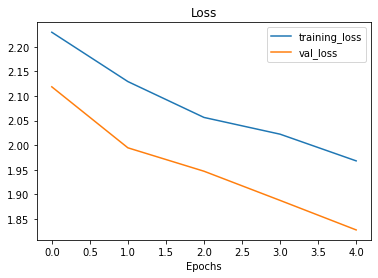

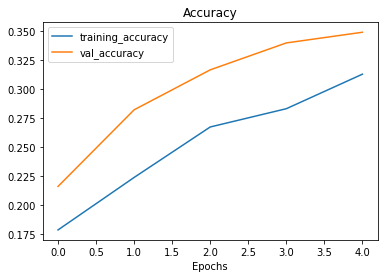

In [91]:
plot_loss_curves(history_11)

In [92]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [93]:
def pred_and_plot(model,filename,class_names=class_names):

  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  print(pred)
  print(tf.argmax(pred[0]))

  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

[[0.12843938 0.09146334 0.13980974 0.04404224 0.14135411 0.07214899
  0.13766508 0.07788158 0.04861567 0.11857983]]
tf.Tensor(4, shape=(), dtype=int64)


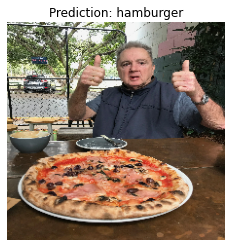

In [94]:
pred_and_plot(model_11,'03-pizza-dad.jpeg')

[[0.05021907 0.09189705 0.05066503 0.15579186 0.15409036 0.09085694
  0.01826    0.04845935 0.28382188 0.0559384 ]]
tf.Tensor(8, shape=(), dtype=int64)


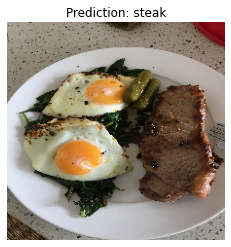

In [95]:
pred_and_plot(model_11,'03-steak.jpeg')

[[0.08346889 0.09399045 0.03106519 0.06238062 0.16649981 0.0628754
  0.14016868 0.09321803 0.14645015 0.11988278]]
tf.Tensor(4, shape=(), dtype=int64)


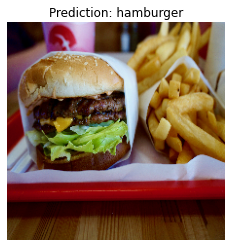

In [96]:
pred_and_plot(model_11,'03-hamburger.jpeg')

[[0.1884462  0.20870733 0.02504455 0.10447589 0.1108418  0.0293543
  0.09435622 0.03894062 0.0987611  0.10107196]]
tf.Tensor(1, shape=(), dtype=int64)


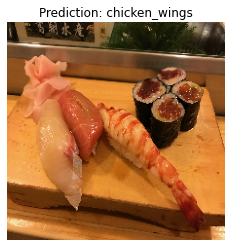

In [97]:
pred_and_plot(model_11,'03-sushi.jpeg')

In [98]:
model_11.save('save_trained_model')

INFO:tensorflow:Assets written to: save_trained_model/assets


In [99]:
loaded_model_11 = tf.keras.models.load_model("save_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8276 - accuracy: 0.3492


[1.8276009559631348, 0.3492000102996826]

In [100]:
model_11.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8276 - accuracy: 0.3492


[1.8276009559631348, 0.3492000102996826]